In [43]:
import numpy as np
import matplotlib.pyplot as plt

def f(x_1,x_2,gamma):
    return (x_1**2 + gamma*x_2**2)/2

def grad_f(x_1,x_2,gamma):
    return [x_1, gamma*x_2]

In [44]:
def stop_condition(x_1,x_2,gamma,t,grad_f,alpha):
    return f(x_1,x_2,gamma) - alpha*t*(grad_f[0]**2+grad_f[1]**2) - f(x_1-t*grad_f[0], x_2 - t*grad_f[1],gamma)

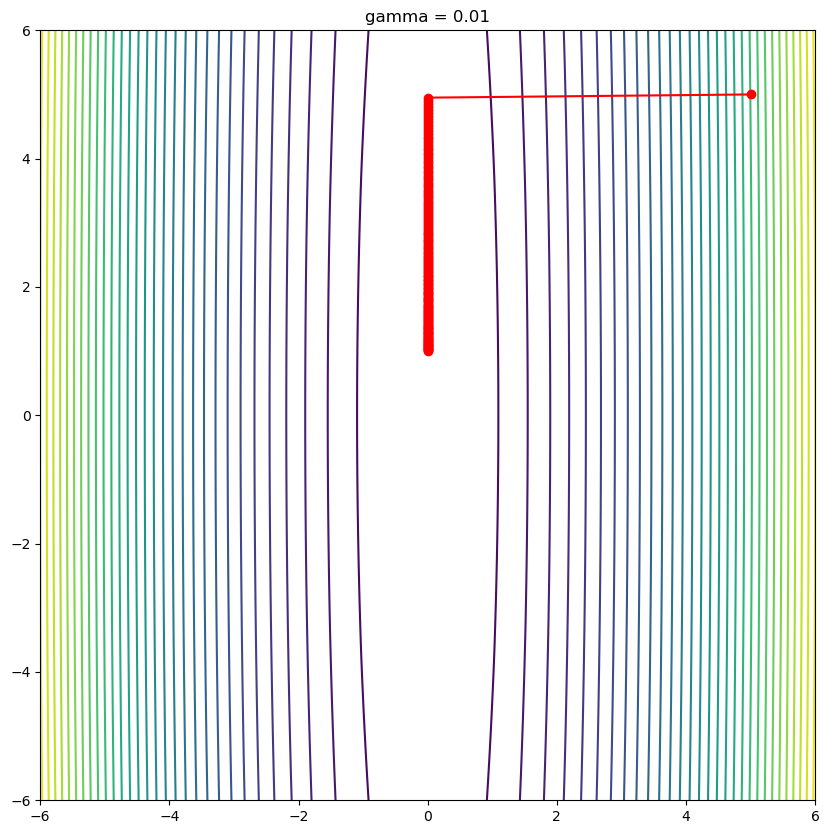

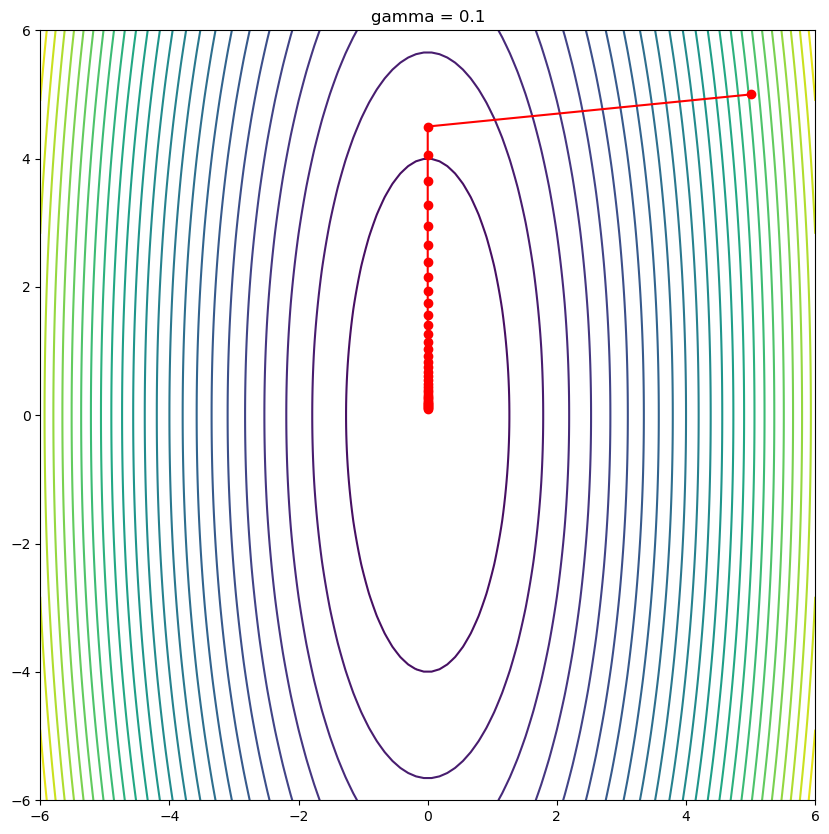

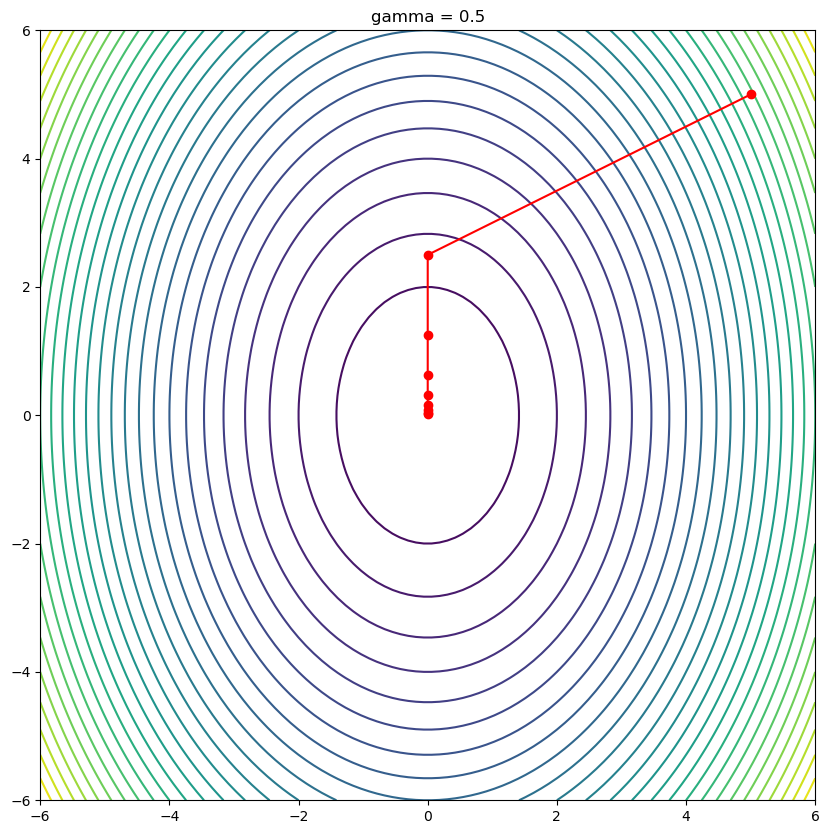

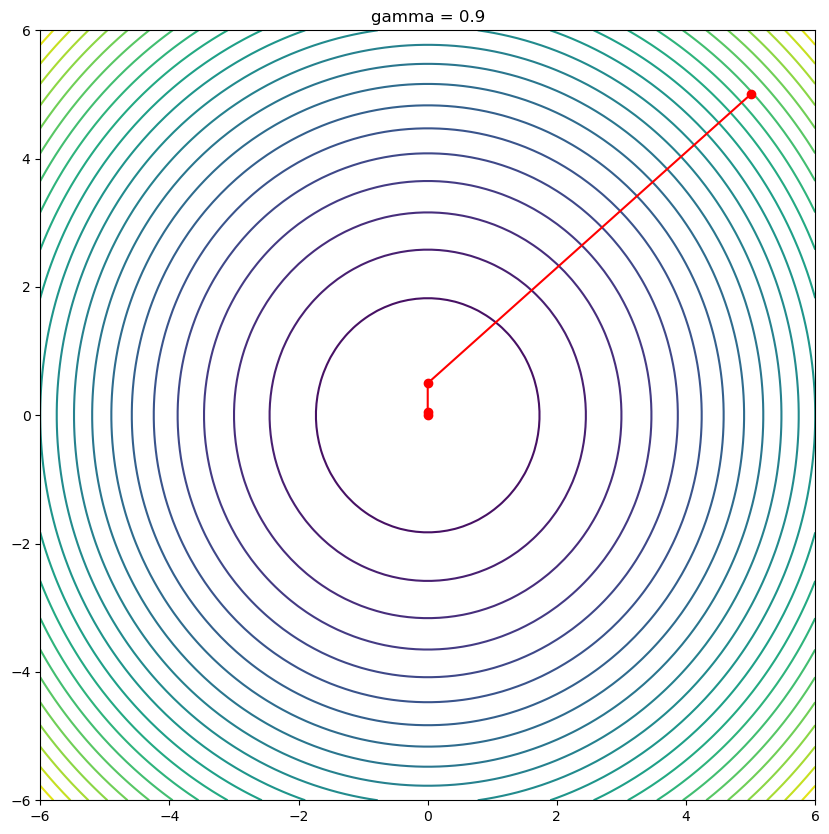

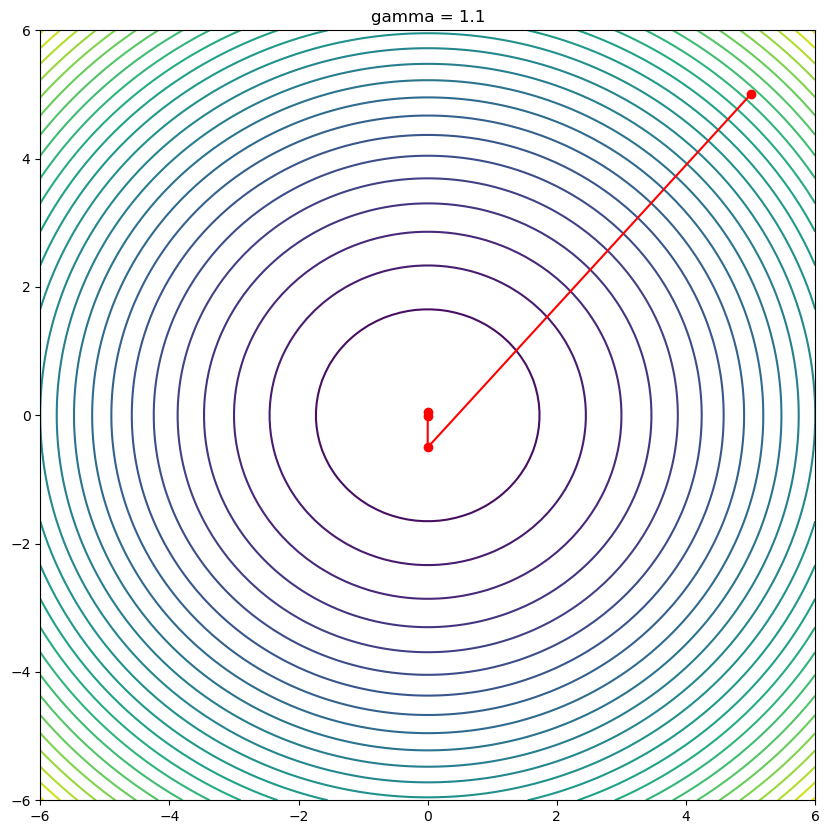

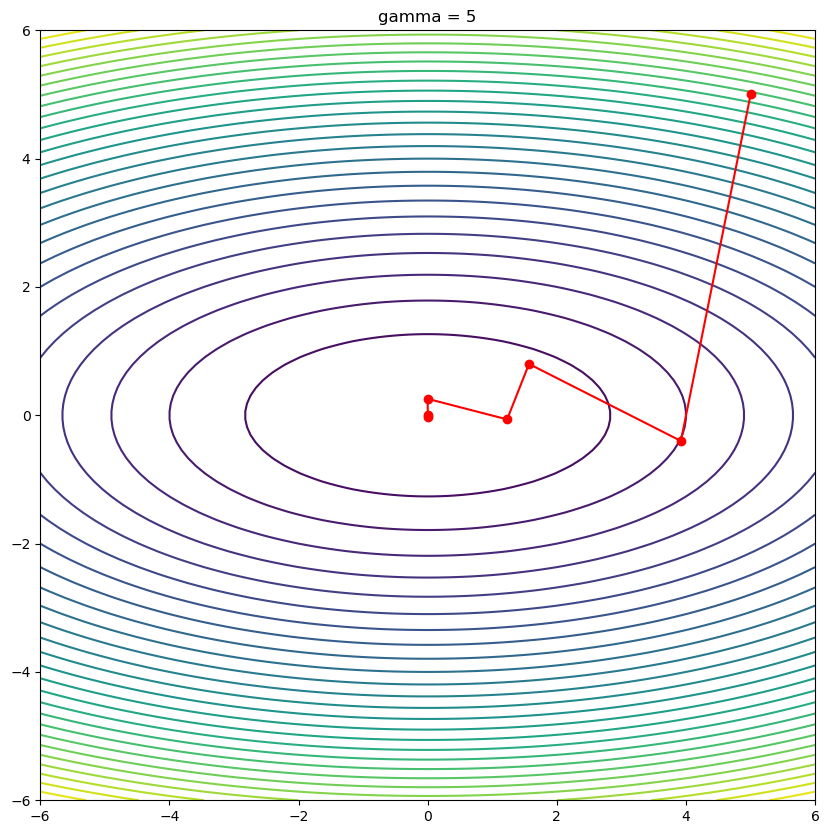

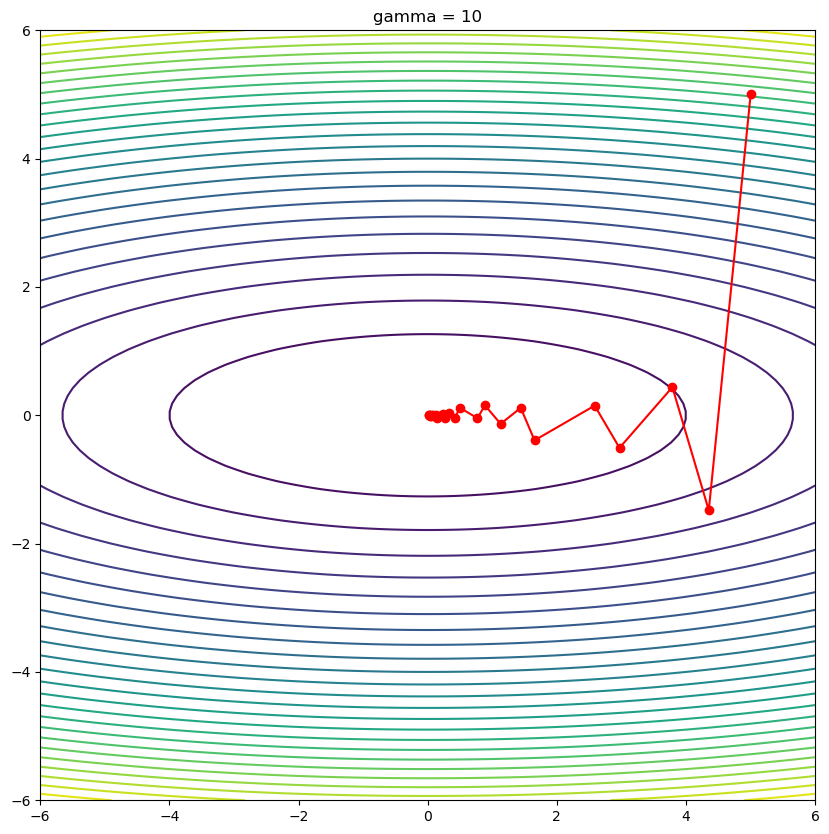

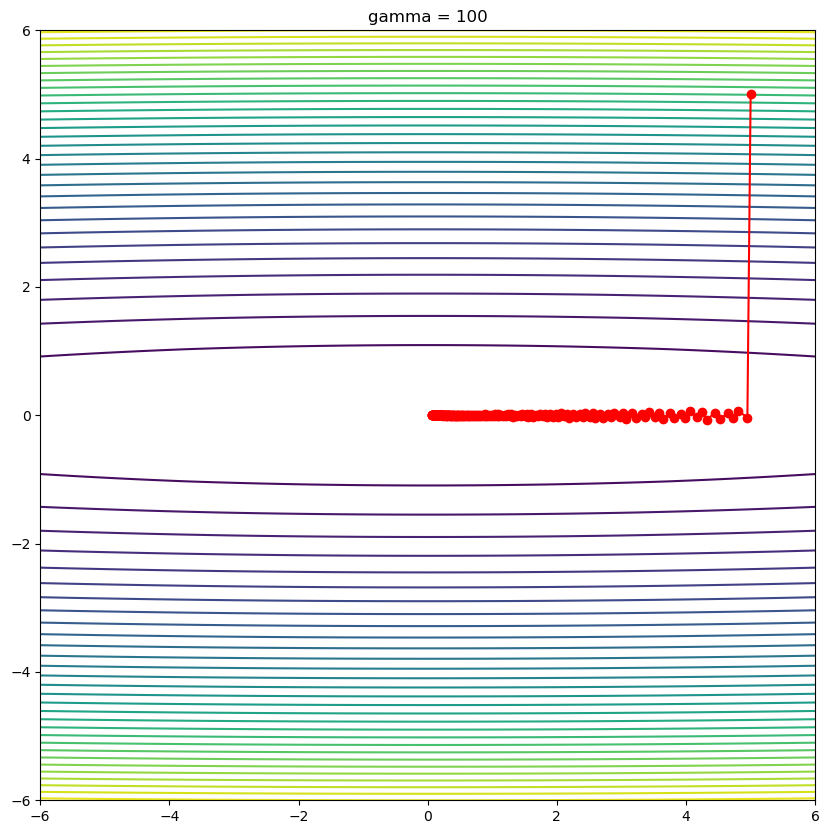

In [45]:
def descent(x_1,x_2,gamma,eps):
    x = [x_1,x_2]
    x_new = [0,0]
    x_record = []
    x_record.append(x.copy())
    while True:
        t =1
        while True:
            if stop_condition(x[0],x[1],gamma,t,grad_f(x[0],x[1],gamma),0.3) > 0:
                break
            else:
                t = 0.6*t
        x_new[0] = x[0] - t*grad_f(x[0],x[1],gamma)[0]
        x_new[1] = x[1] - t*grad_f(x[0],x[1],gamma)[1]
        if abs(f(x_new[0],x_new[1],gamma) - f(x[0],x[1],gamma)) < eps:
            break
        x = x_new.copy()
        x_record.append(x_new.copy())
    return [x_new, x_record]

def plot_contour(x_1,x_2,gamma):
    x = np.linspace(-6,6,100)
    y = np.linspace(-6,6,100)
    X, Y = np.meshgrid(x,y)
    Z = f(X,Y,gamma)
    plt.figure(figsize=(10,10))
    plt.contour(X,Y,Z,levels=30)
    plt.plot([x[0] for x in descent(x_1,x_2,gamma,0.0001)[1]],[x[1] for x in descent(x_1,x_2,gamma,0.0001)[1]],'ro-')
    plt.title('gamma = ' + str(gamma))
    plt.show()

plot_contour(5,5,0.01)
plot_contour(5,5,0.1)
plot_contour(5,5,0.5)
plot_contour(5,5,0.9)
plot_contour(5,5,1.1)
plot_contour(5,5,5)
plot_contour(5,5,10)
plot_contour(5,5,100)

In [46]:
import numpy as np
import matplotlib.pyplot as plt

def generate_positive_definite_matrix(size,mu,L):
    A = np.random.rand(size, size)
    B = np.dot(A, A.transpose())
    eigenvalues = np.linalg.eigvals(B)
    m = max(eigenvalues)
    n = min(eigenvalues)
    B = (L-mu)/(m-n)*B - (L*n-m*mu)/(m-n)*np.identity(size)
    return B

In [47]:
d = 6
mu_1 = 3
mu_2 = 0
mu_3 = 0.01
L = 10


A_1 = generate_positive_definite_matrix(d,mu_1,L)
A_2 = generate_positive_definite_matrix(d,mu_2,L)
A_3 = generate_positive_definite_matrix(d,mu_3,L)

def f_2(x,A):
    return (np.dot(np.dot(x.transpose(),A),x)/2).item()

def grad_f_2(x,A):
    return np.dot(A,x)

x = np.random.rand(d,1)

def descent(x_0,A,eps,alpha):
    x = x_0
    x_record = []
    f_record = []
    x_record.append(x.copy())
    #f_record.append(f_2(x.copy(),A))
    n=0
    while True:
        n += 1
        x_new = x - alpha*grad_f_2(x,A)
        if abs(f_2(x_new,A)) < eps:
            break
        x_record.append(x_new.copy())
        f_record.append(f_2(x_new.copy(),A))
        x = x_new.copy()
        if n > 2000:
            break
    return [x,x_record,f_record]


Text(0.5, 1.0, 'mu = 3  L = 10')

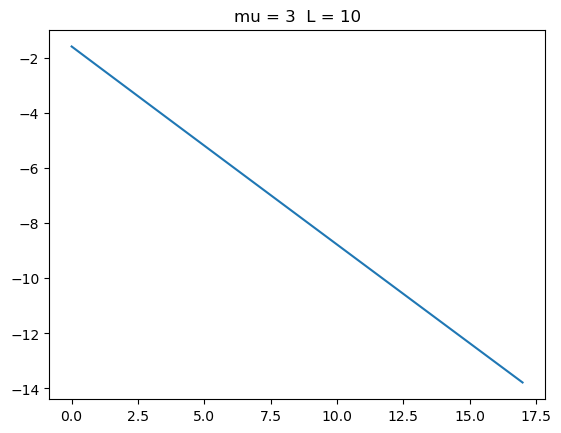

In [48]:
plt.plot(np.log(descent(x,A_1,1e-6,1/L)[2]))
plt.title('mu = ' + str(mu_1) + '  L = ' + str(L))

Text(0.5, 1.0, 'mu = 0  L = 10')

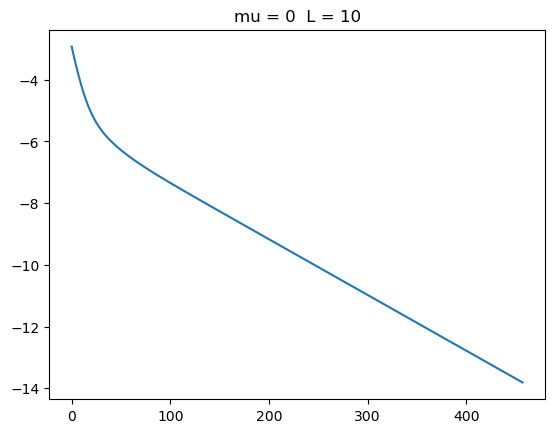

In [49]:
plt.plot(np.log(descent(x,A_2,1e-6,1/L)[2]))
plt.title('mu = ' + str(mu_2) + '  L = ' + str(L))

Text(0.5, 1.0, 'mu = 0.01  L = 10')

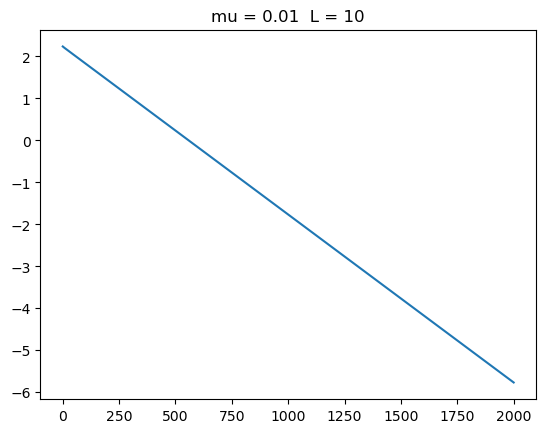

In [50]:
plt.plot(np.log(descent(x,A_3,1e-6,2/(L+mu_3))[2]))
plt.title('mu = ' + str(mu_3) + '  L = ' + str(L))

Text(0.5, 1.0, 'mu = 0  L = 10')

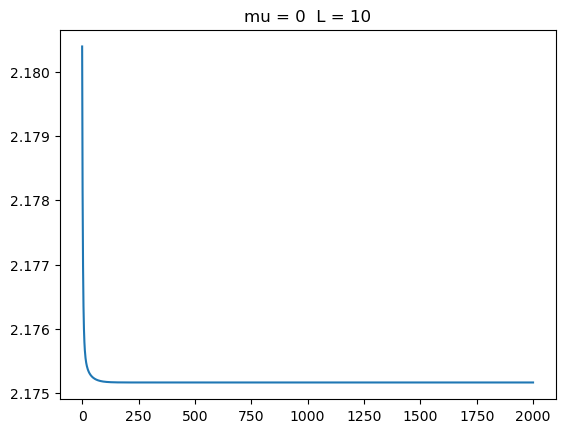

In [51]:
plt.plot(np.log(descent(x,A_2,1e-6,2/(L+mu_2))[2]))
plt.title('mu = ' + str(mu_2) + '  L = ' + str(L))